# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://course.cse.ust.hk/comp4901j/Password_Only/programs/assignment1/index.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [36]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [37]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        _ = svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs, num_iters=2000, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        training_accuracy = np.mean(y_train == y_train_pred)
        validation_accuracy = np.mean(y_val == y_val_pred)
                                      
        results[(lr, rs)] = (training_accuracy, validation_accuracy)
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 2000: loss 89.853360
iteration 100 / 2000: loss 89.053680
iteration 200 / 2000: loss 88.246222
iteration 300 / 2000: loss 87.476631
iteration 400 / 2000: loss 86.678185
iteration 500 / 2000: loss 85.914505
iteration 600 / 2000: loss 85.135752
iteration 700 / 2000: loss 84.376792
iteration 800 / 2000: loss 83.635848
iteration 900 / 2000: loss 82.880105
iteration 1000 / 2000: loss 82.154075
iteration 1100 / 2000: loss 81.420348
iteration 1200 / 2000: loss 80.696028
iteration 1300 / 2000: loss 79.987399
iteration 1400 / 2000: loss 79.290591
iteration 1500 / 2000: loss 78.594661
iteration 1600 / 2000: loss 77.875369
iteration 1700 / 2000: loss 77.213568
iteration 1800 / 2000: loss 76.526163
iteration 1900 / 2000: loss 75.854134
iteration 0 / 2000: loss 788.187112
iteration 100 / 2000: loss 714.006204
iteration 200 / 2000: loss 646.908365
iteration 300 / 2000: loss 586.191126
iteration 400 / 2000: loss 531.252759
iteration 500 / 2000: loss 481.539905
iteration 600 / 2000: loss

In [6]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.424


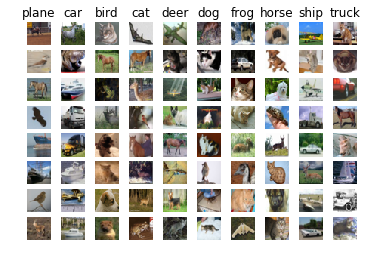

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

**Your Answer:** Some of them are make sense, they are similar object with true label. They may just confused with the texture or the color.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [8]:
print(X_train_feats.shape)

(49000, 155)


iteration 0 / 2500: loss 2.302587
iteration 100 / 2500: loss 1.399649
iteration 200 / 2500: loss 1.450044
iteration 300 / 2500: loss 1.368200
iteration 400 / 2500: loss 1.378770
iteration 500 / 2500: loss 1.352054
iteration 600 / 2500: loss 1.357826
iteration 700 / 2500: loss 1.242733
iteration 800 / 2500: loss 1.298768
iteration 900 / 2500: loss 1.344357
iteration 1000 / 2500: loss 1.234391
iteration 1100 / 2500: loss 1.258137
iteration 1200 / 2500: loss 1.254921
iteration 1300 / 2500: loss 1.150693
iteration 1400 / 2500: loss 1.273076
iteration 1500 / 2500: loss 1.104193
iteration 1600 / 2500: loss 1.212725
iteration 1700 / 2500: loss 1.242298
iteration 1800 / 2500: loss 1.234188
iteration 1900 / 2500: loss 1.231018
iteration 2000 / 2500: loss 1.133880
iteration 2100 / 2500: loss 1.227640
iteration 2200 / 2500: loss 1.273688
iteration 2300 / 2500: loss 1.214625
iteration 2400 / 2500: loss 1.268211


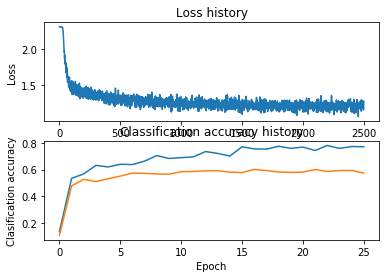

In [38]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
    num_iters=2500, batch_size=500,
    learning_rate=0.6, learning_rate_decay=0.995,
    reg=2e-3, verbose=True)
y_train_pred = net.predict(X_train_feats)
y_val_pred = net.predict(X_val_feats)
training_accuracy = np.mean(y_train == y_train_pred)
validation_accuracy = np.mean(y_val == y_val_pred)

best_net = net

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.show()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [39]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.592


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

# Bonus: Considering HOG and Color histogram seperately

In [40]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

### (a) HOG

In [43]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns_hog = [hog_feature] # removing the color histogram from the features
X_train_feats_hog = extract_features(X_train, feature_fns_hog, verbose=True)
X_val_feats_hog = extract_features(X_val, feature_fns_hog)
X_test_feats_hog = extract_features(X_test, feature_fns_hog)

# Preprocessing: Subtract the mean feature
mean_feat_hog = np.mean(X_train_feats_hog, axis=0, keepdims=True)
X_train_feats_hog -= mean_feat_hog
X_val_feats_hog -= mean_feat_hog
X_test_feats_hog -= mean_feat_hog

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat_hog = np.std(X_train_feats_hog, axis=0, keepdims=True)
X_train_feats_hog /= std_feat_hog
X_val_feats_hog /= std_feat_hog
X_test_feats_hog /= std_feat_hog

# Preprocessing: Add a bias dimension
X_train_feats_hog = np.hstack([X_train_feats_hog, np.ones((X_train_feats_hog.shape[0], 1))])
X_val_feats_hog = np.hstack([X_val_feats_hog, np.ones((X_val_feats_hog.shape[0], 1))])
X_test_feats_hog = np.hstack([X_test_feats_hog, np.ones((X_test_feats_hog.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

iteration 0 / 2500: loss 2.302587
iteration 100 / 2500: loss 1.575121
iteration 200 / 2500: loss 1.468687
iteration 300 / 2500: loss 1.506819
iteration 400 / 2500: loss 1.387957
iteration 500 / 2500: loss 1.443671
iteration 600 / 2500: loss 1.338420
iteration 700 / 2500: loss 1.294503
iteration 800 / 2500: loss 1.363663
iteration 900 / 2500: loss 1.339390
iteration 1000 / 2500: loss 1.293363
iteration 1100 / 2500: loss 1.315901
iteration 1200 / 2500: loss 1.236268
iteration 1300 / 2500: loss 1.356909
iteration 1400 / 2500: loss 1.383430
iteration 1500 / 2500: loss 1.319042
iteration 1600 / 2500: loss 1.324812
iteration 1700 / 2500: loss 1.328916
iteration 1800 / 2500: loss 1.338440
iteration 1900 / 2500: loss 1.271122
iteration 2000 / 2500: loss 1.231211
iteration 2100 / 2500: loss 1.322795
iteration 2200 / 2500: loss 1.293609
iteration 2300 / 2500: loss 1.330281
iteration 2400 / 2500: loss 1.331336


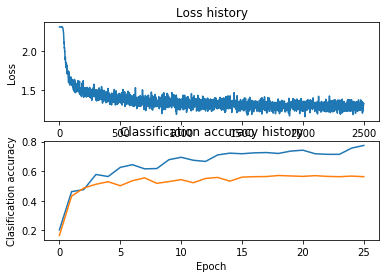

In [44]:
# train the neural network with the same hyperparameters

from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats_hog.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
# best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
stats_hog = net.train(X_train_feats_hog, y_train, X_val_feats_hog, y_val,
    num_iters=2500, batch_size=500,
    learning_rate=0.6, learning_rate_decay=0.995,
    reg=2e-3, verbose=True)
y_train_pred_hog = net.predict(X_train_feats_hog)
y_val_pred_hog = net.predict(X_val_feats_hog)
training_accuracy_hog = np.mean(y_train == y_train_pred_hog)
validation_accuracy_hog = np.mean(y_val == y_val_pred_hog)

# best_net = net

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats_hog['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats_hog['train_acc_history'], label='train')
plt.plot(stats_hog['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.show()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [46]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc_hog = (net.predict(X_test_feats_hog) == y_test).mean()
print(test_acc_hog)

0.556


Only using the HOG feature can also train the model with high accuracy easily (> 55%).

### (b) Color Histogram

In [49]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns_ch = [lambda img: color_histogram_hsv(img, nbin=num_color_bins)] # removing the HOG from the features
X_train_feats_ch = extract_features(X_train, feature_fns_ch, verbose=True)
X_val_feats_ch = extract_features(X_val, feature_fns_ch)
X_test_feats_ch = extract_features(X_test, feature_fns_ch)

# Preprocessing: Subtract the mean feature
mean_feat_ch = np.mean(X_train_feats_ch, axis=0, keepdims=True)
X_train_feats_ch -= mean_feat_ch
X_val_feats_ch -= mean_feat_ch
X_test_feats_ch -= mean_feat_ch

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat_ch = np.std(X_train_feats_ch, axis=0, keepdims=True)
X_train_feats_ch /= std_feat_ch
X_val_feats_ch /= std_feat_ch
X_test_feats_ch /= std_feat_ch

# Preprocessing: Add a bias dimension
X_train_feats_ch = np.hstack([X_train_feats_ch, np.ones((X_train_feats_ch.shape[0], 1))])
X_val_feats_ch = np.hstack([X_val_feats_ch, np.ones((X_val_feats_ch.shape[0], 1))])
X_test_feats_ch = np.hstack([X_test_feats_ch, np.ones((X_test_feats_ch.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

iteration 0 / 2500: loss 2.302585
iteration 100 / 2500: loss 2.092817
iteration 200 / 2500: loss 2.040051
iteration 300 / 2500: loss 2.030746
iteration 400 / 2500: loss 2.078963
iteration 500 / 2500: loss 2.027615
iteration 600 / 2500: loss 2.051385
iteration 700 / 2500: loss 2.108067
iteration 800 / 2500: loss 2.031309
iteration 900 / 2500: loss 2.041953
iteration 1000 / 2500: loss 2.063391
iteration 1100 / 2500: loss 2.065294
iteration 1200 / 2500: loss 2.042359
iteration 1300 / 2500: loss 2.038657
iteration 1400 / 2500: loss 2.008065
iteration 1500 / 2500: loss 2.007732
iteration 1600 / 2500: loss 2.045545
iteration 1700 / 2500: loss 2.047836
iteration 1800 / 2500: loss 2.073856
iteration 1900 / 2500: loss 2.042972
iteration 2000 / 2500: loss 2.029810
iteration 2100 / 2500: loss 2.030889
iteration 2200 / 2500: loss 2.045380
iteration 2300 / 2500: loss 2.003303
iteration 2400 / 2500: loss 2.022490


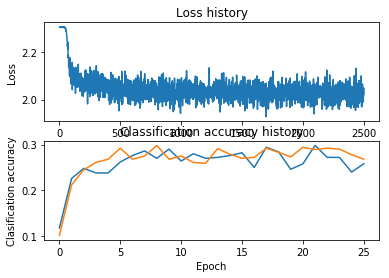

In [52]:
# train the neural network with the same hyperparameters

from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats_ch.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
stats_ch = net.train(X_train_feats_ch, y_train, X_val_feats_ch, y_val,
    num_iters=2500, batch_size=500,
    learning_rate=0.6, learning_rate_decay=0.995,
    reg=2e-3, verbose=True)
y_train_pred_ch = net.predict(X_train_feats_ch)
y_val_pred_ch = net.predict(X_val_feats_ch)
training_accuracy_ch = np.mean(y_train == y_train_pred_ch)
validation_accuracy_ch = np.mean(y_val == y_val_pred_ch)

# best_net = net

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats_ch['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats_ch['train_acc_history'], label='train')
plt.plot(stats_ch['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.show()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [53]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc_ch = (net.predict(X_test_feats_ch) == y_test).mean()
print(test_acc_ch)

0.268


With using the same hyperparameters, it seems that the loss stop at around 2. And the accuracies are not stable. I guess the reason behind is that, the color histogram contain the distribution of RGB color only. There are a lot of distanct objects share the same color. We could find some examples from the KNN task, and from the SVM model above. The images of cats and horses, cars and trucks and similiar in RGB color distribution.

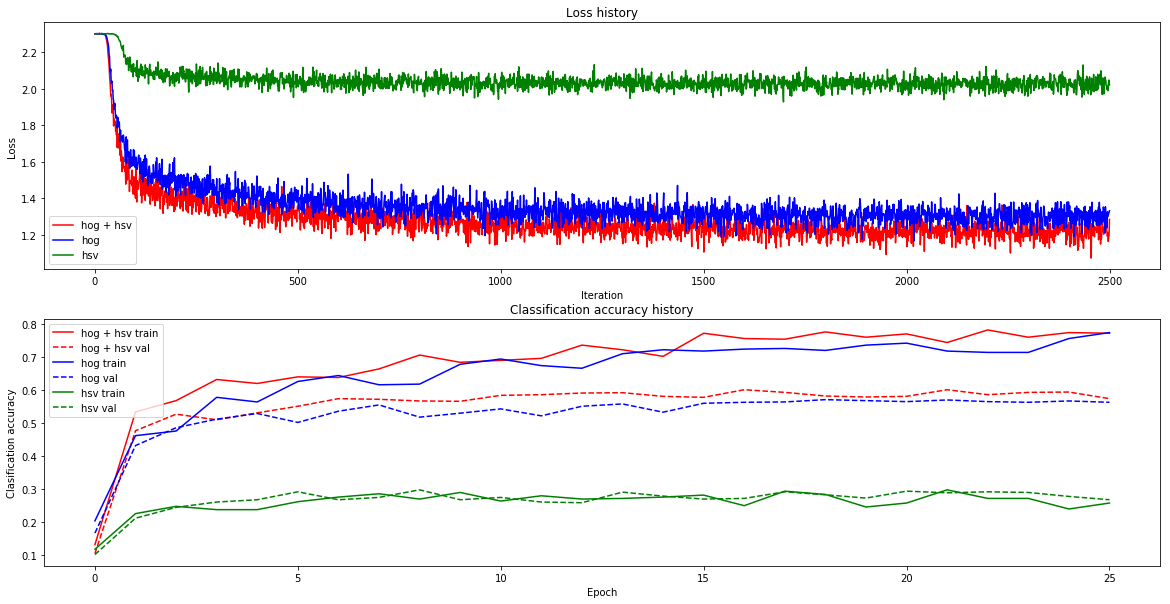

In [56]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'], 'r', label='hog + hsv')
plt.plot(stats_hog['loss_history'], 'b', label='hog')
plt.plot(stats_ch['loss_history'], 'g', label='hsv')
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], 'r-', label='hog + hsv train')
plt.plot(stats['val_acc_history'], 'r--', label='hog + hsv val')

plt.plot(stats_hog['train_acc_history'], 'b-', label='hog train')
plt.plot(stats_hog['val_acc_history'], 'b--', label='hog val')

plt.plot(stats_ch['train_acc_history'], 'g-', label='hsv train')
plt.plot(stats_ch['val_acc_history'], 'g--', label='hsv val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()